# Open Rice

** 1.) ** We scrapped a data set from open rice but it needs cleaning:

* Remove duplicate data.
* Use a regex to clean the reviews column.
* Remove the trailing commar from the address column.


In [28]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 8)
sns.set_style('whitegrid')

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 8)
sns.set_style('whitegrid')

In [4]:
# import openrice data into dataframe
df = pd.read_csv("data/open-rice.csv")

In [5]:
# verify import of data
df.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100


In [6]:
# summary of openrice data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26165 entries, 0 to 26164
Data columns (total 8 columns):
address              26165 non-null object
bookmarks            26165 non-null int64
dislikes             26165 non-null int64
food_type            26165 non-null object
likes                26165 non-null int64
name                 26165 non-null object
number_of_reviews    26165 non-null object
price_range          26165 non-null object
dtypes: int64(3), object(5)
memory usage: 1.6+ MB


In [7]:
# drop duplicate data
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21299 entries, 0 to 26164
Data columns (total 8 columns):
address              21299 non-null object
bookmarks            21299 non-null int64
dislikes             21299 non-null int64
food_type            21299 non-null object
likes                21299 non-null int64
name                 21299 non-null object
number_of_reviews    21299 non-null object
price_range          21299 non-null object
dtypes: int64(3), object(5)
memory usage: 1.5+ MB


In [9]:
# function to clean 'number_of_reviews' column by deleting everything except digits
def parse_rev(s):
    # search 
    n = re.search(r"\((\d+)(\s\w+\))", s)
    # match
    if n:
        return int(n.group(1))
    return np.nan

In [10]:
df['number_of_reviews'] = df['number_of_reviews'].apply(parse_rev)

In [11]:
df.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


In [12]:
df.dtypes

address              object
bookmarks             int64
dislikes              int64
food_type            object
likes                 int64
name                 object
number_of_reviews     int64
price_range          object
dtype: object

In [13]:
# function to clean 'address' column by deleting last comma
def parse_add(s):
    a = re.search(r"(.+)(\,)$", s)
    if a:
        return a.group(1)
    return np.nan

In [14]:
df['address'] = df['address'].apply(parse_add)

In [15]:
df.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


In [16]:
df.shape

(21299, 8)

In [5]:
# %load solutions/openrice_1.py


In [6]:
openrice.shape

(21299, 8)

In [7]:
# %load solutions/clean_reviews.py


** 2.) ** Which resturant in Hong Kong is the most favorable? In terms of likes, in terms of bookmarks?

In [17]:
# %load solutions/openrice_2.py


In [18]:
# most restaurant likes
likes = df.sort_values(by='likes', ascending=False)
likes.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
569,"G/F, 47-49 Parkes Street",35511,267,Hong Kong Style,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50
23128,"G/F, 47-49 Parkes Street",35511,267,Tea Restaurant,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50
20272,"G/F, 7A-7B Tak Hing Street",13740,267,Western,1585,Pom's Kitchen & Deli,2595,$101-200
243,2 Mei Lun Street,38286,76,Hong Kong Style,929,Sing Heung Yuen 勝香園,1309,Below $50
23126,2 Mei Lun Street,38286,76,Tea Restaurant,929,Sing Heung Yuen 勝香園,1309,Below $50


In [19]:
# most restaurant bookmarks
bk = df.sort_values(by='bookmarks', ascending=False)
bk.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
233,"Level L, Cordis, Hong Kong at Langham Place, 5...",43087,67,International,210,The Place,422,$401-800
16788,"Level L, Cordis, Hong Kong at Langham Place, 5...",43087,67,Hotel Restaurant,210,The Place,422,$401-800
21623,"Level L, Cordis, Hong Kong at Langham Place, 5...",43087,7,International,223,The Place,265,$401-800
18573,"Shop 1-2, G/F, Kiu Fung Mansion, 83-89 Kimberl...",40506,11,Bar,272,LAB EAT Restaurant & Bar,353,$201-400
20316,"Shop 1-2, G/F, Kiu Fung Mansion, 83-89 Kimberl...",40506,25,Western,385,LAB EAT Restaurant & Bar,487,$201-400


** 3.) ** What is the price range for the whole open rice dataset?

In [20]:
pr = df['price_range'].value_counts()
pr

Below $50     7808
$101-200      5221
$51-100       4963
$201-400      2511
$401-800       635
Above $801     161
Name: price_range, dtype: int64

In [21]:
# %load solutions/openrice_3.py


** 4.) ** By grouping price_range with mean and median, what can you observe from bookmarks and likes?


In [22]:
# %load solutions/openrice_4.py


In [23]:
gpr = df.groupby('price_range', as_index=False)[['bookmarks', 'dislikes','likes', 'number_of_reviews']].agg(['mean','median'])

In [24]:
gpr

bookmarks         dislikes             likes         \
                    mean median      mean median       mean median   
price_range                                                          
$101-200     2769.002873   1140  6.826662      3  61.536870     30   
$201-400     3928.314217   2406  7.892473      3  73.731581     45   
$401-800     5220.737008   3004  8.981102      3  72.302362     49   
$51-100      1524.368729    391  4.830748      2  35.782793     13   
Above $801   4422.403727   3750  4.677019      3  62.838509     32   
Below $50     753.235528    105  3.259606      1  20.575307      6   

            number_of_reviews         
                         mean median  
price_range                           
$101-200            89.860372     50  
$201-400           105.420151     67  
$401-800           107.455118     77  
$51-100             56.527504     25  
Above $801          83.726708     52  
Below $50           34.934554     13

Text(0,0.5,'likes')

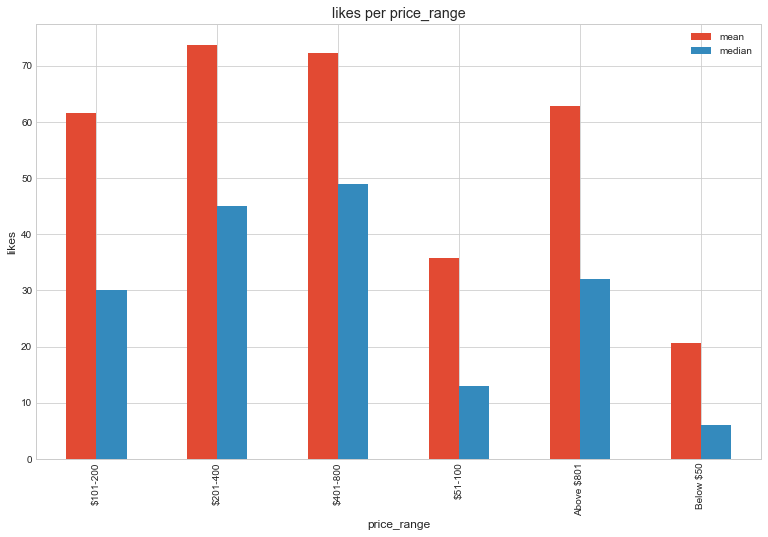

In [34]:
# amount of likes per 'price_range'
fig, axes = plt.subplots(figsize=(13,8))
gpr.plot.bar(ax= axes, y='likes')
plt.title('likes per price_range')
plt.ylabel('likes')

Text(0,0.5,'bookmarks')

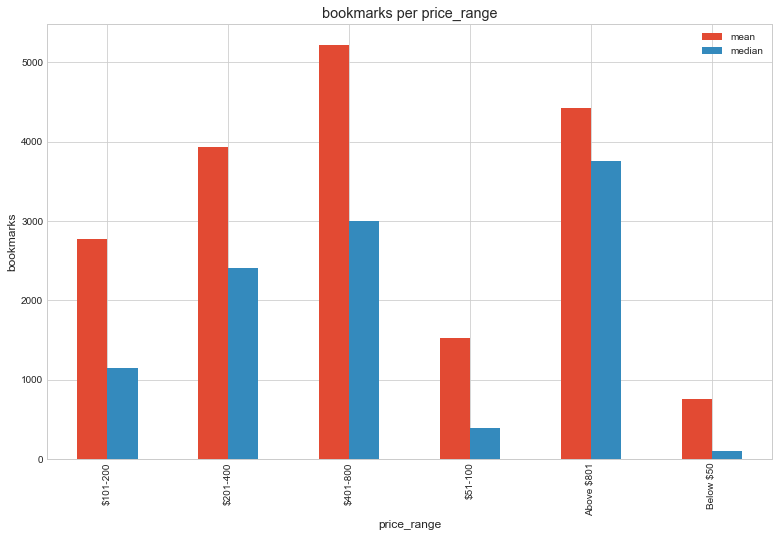

In [33]:
# amount of 'bookmarks per price_range'
gpr.plot.bar(y='bookmarks')
plt.title('bookmarks per price_range')
plt.ylabel('bookmarks')

Text(0.5,1,'overall plot')

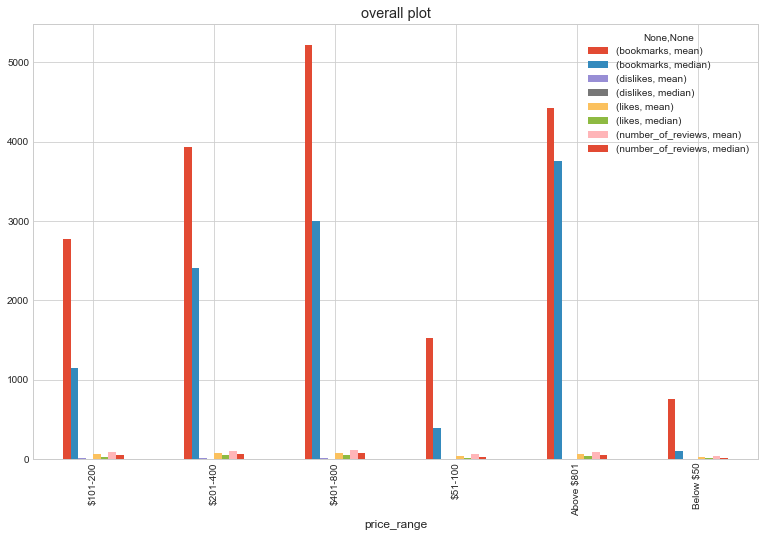

In [35]:
# gpr bar plot
gpr.plot.bar()
plt.title('overall plot')

** 5.) ** Select price_range, likes, bookmarks,  HKresturant as a new dataframe 

In [258]:
# %load solutions/openrice_5.py


In [36]:
# dataframe of only HK restaurants
df_hk = df[df['food_type']=='Hong Kong Style'][['food_type','price_range', 'likes','bookmarks']]

In [37]:
df_hk.head()

,food_type,price_range,likes,bookmarks
0,Hong Kong Style,Below $50,78,5838
3,Hong Kong Style,Below $50,23,1173
28,Hong Kong Style,$101-200,3,2752
30,Hong Kong Style,$101-200,47,2370
46,Hong Kong Style,$101-200,97,2370


** 6.) ** Use your new dataframe make box plot and violin plots

Text(0.5,1,'Bookmarks per price_range')

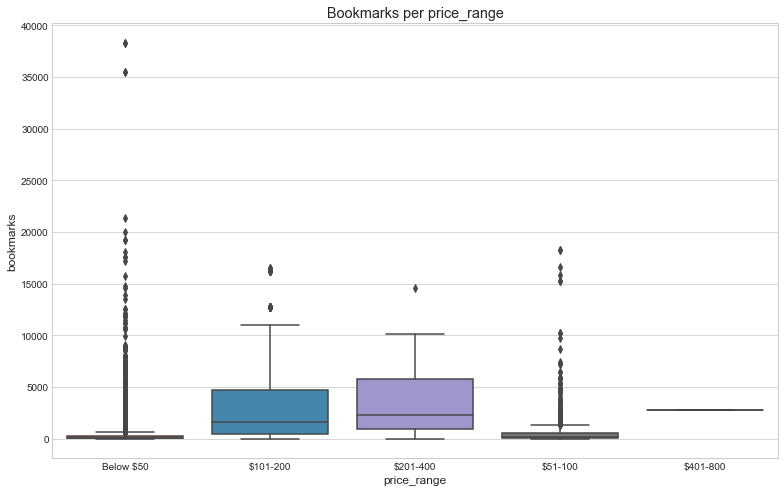

In [38]:
# box plot of 'bookmarks per price_range'
sns.boxplot(x = 'price_range', y= 'bookmarks', data=df_hk)
plt.title('Bookmarks per price_range')

Text(0.5,1,'distributuion of bookmarks by price_range')

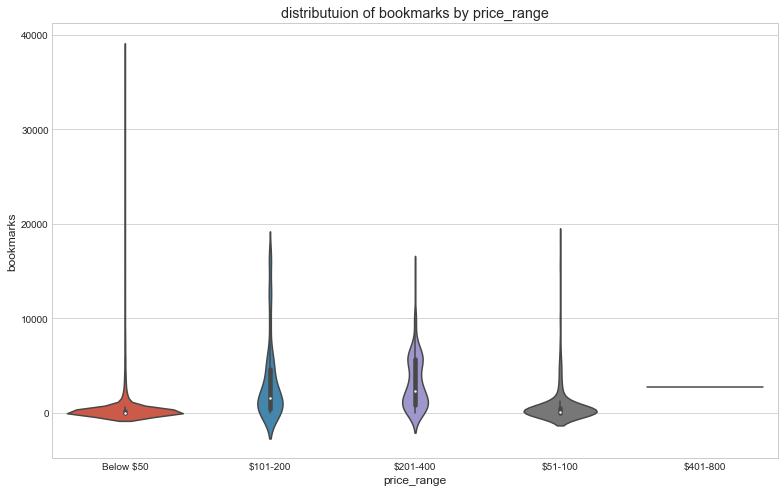

In [40]:
sns.violinplot(x ='price_range', y='bookmarks', data= df_hk)
plt.title('distributuion of bookmarks by price_range')

In [227]:
# %load solutions/openrice_6.1.py


Text(0.5,1,'Likes per price_range')

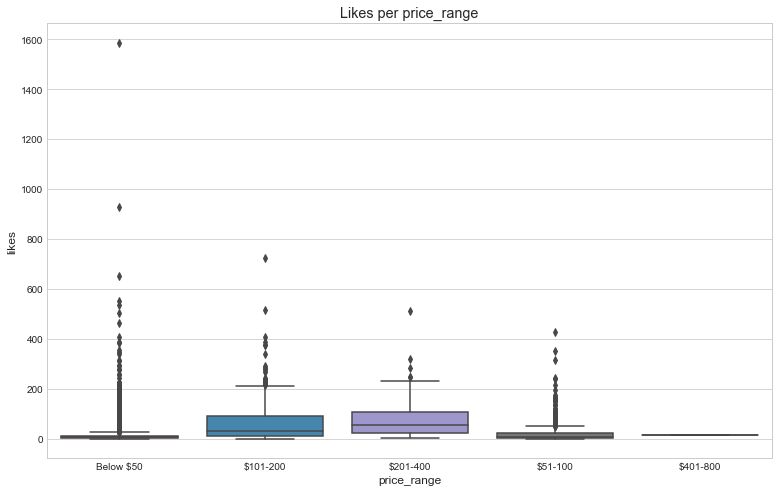

In [43]:
# box plot of 'likes by price_range'
sns.boxplot(x='price_range', y='likes', data=df_hk)
plt.title('Likes per price_range')

Text(0.5,1,'likes per price_range')

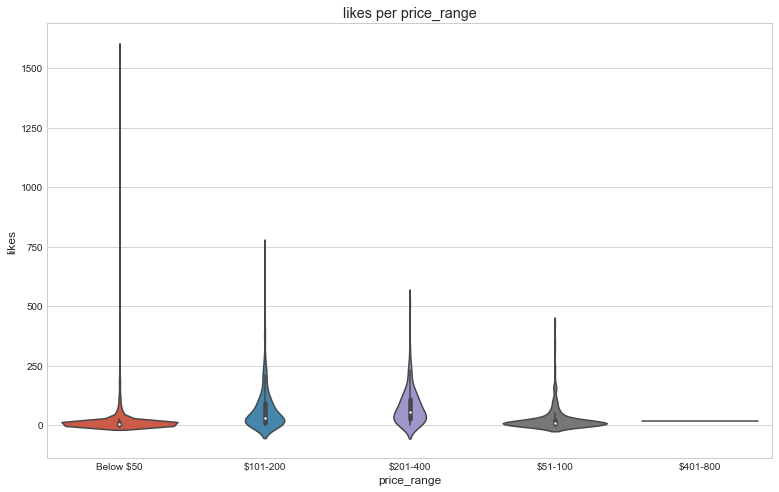

In [42]:
# violon plot of 'likes by price_range'
sns.violinplot(x='price_range', y='likes', data=df_hk)
plt.title('likes per price_range')

In [229]:
# %load solutions/openrice_6.2.py


# Unicef Data

When working with data we may aberiviate the columns names to make them simpler to type. However we need to be anle to change them back 


In [44]:
import pandas as pd

In [45]:
# import csv from url
unicef = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn.csv")

/Users/kwf/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (110,111,112,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
unicef.head()

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


In [47]:
# drop unnamed column
unicef = unicef.drop(columns=unicef.columns[0])

 ** 1.) ** Drop the unnamed column

In [302]:
# %load solutions/unicef_1.py


** 2.) ** Use the data in `header_df` to replace the `Name` with it's `Label` in the original dataframe.

In [48]:
unicef_header = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn_headers.csv")

In [49]:
unicef_header.head()

,Name,Label,Question
0,HH1,Cluster number,NaN
1,HH2,Household number,NaN
2,LN,Line number,NaN
3,MWM1,Cluster number,NaN
4,MWM2,Household number,NaN


In [50]:
col_labels = dict(zip(unicef_header['Name'], unicef_header['Label']))

In [56]:
# renaming unicef columns with proper labels
unicef = unicef.rename(columns=col_labels).head()

In [52]:
# %load solutions/unicef_2.py


In [57]:
unicef.head()

,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,Year of interview,...,Children surviving,Children dead,mwelevel,mnweight,Wealth index score,Wealth index quintiles,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


In [61]:
unicef.columns

Index(['Cluster number', 'Household number', 'Line number', 'Cluster number',
       'Household number', 'Man's line number', 'Interviewer number',
       'Day of interview', 'Month of interview', 'Year of interview',
       ...
       'Children surviving', 'Children dead', 'mwelevel', 'mnweight',
       'Wealth index score', 'Wealth index quintiles', 'wscoreu', 'windex5u',
       'wscorer', 'windex5r'],
      dtype='object', length=158)

# Ricacorp

** 1.) ** Reading in the file. *Hint*  Which type of format it is? Also you'll need to change the encoding to 'utf-16'.

In [64]:
# import data 
rc = pd.read_csv('data/ricacorp-real-estate-sales.tsv', sep='\t', encoding='utf-16')

In [65]:
rc.head()

,Area,web-scraper-order,web-scraper-start-url,pagination,pagination-href,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,1521007907-3932,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,1521007147-2665,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,1521006995-2269,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,1521008121-4522,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,1521006897-2016,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M


In [277]:
import pandas as pd

In [278]:
# %load solutions/ricacorp_1.py


** 2.) ** Remove the useless columns like web-scraper-order, pagination etc.

In [66]:
rc.columns

Index(['Area', 'web-scraper-order', 'web-scraper-start-url', 'pagination',
       'pagination-href', 'characteristic', 'floor type', 'hkd millions',
       'rent hkd', 'area', 'address', 'last updated', 'pay per month',
       'loan %', '1st payment'],
      dtype='object')

In [67]:
drop_col = ['web-scraper-order', 'web-scraper-start-url', 'pagination',
       'pagination-href']

In [68]:
rc = rc.drop(columns= drop_col)

In [69]:
rc = rc.drop_duplicates()

In [279]:
# %load solutions/ricacorp_2.py


In [70]:
rc.isnull().sum().sort_values(ascending=False)

rent hkd          7481
characteristic    2002
floor type         341
1st payment          0
loan %               0
pay per month        0
last updated         0
address              0
area                 0
hkd millions         0
Area                 0
dtype: int64

In [71]:
# fill numerical category NaN values
rc['rent hkd'] = rc['rent hkd'].fillna(value=0)

In [72]:
# function to clean 'pay per month' values to floats
def ppm(s):
    
    p = re.search(r"(Pay/M.*\$)(\d+\.*\d+)k", s)
    if p:
        return float(p.group(2))
    return np.nan

In [73]:
rc['pay per month'] = rc['pay per month'].apply(ppm)

In [74]:
# changing column name
rc = rc.rename(columns={'pay per month': 'pay per month (k)'})

In [75]:
# cleaning 'loan %'
def loan(s):
    
    l = re.search(r"(Loan%.*\D)(\d+)(\%)", s)
    if l:
        return float(l.group(2))
    return np.nan

In [78]:
rc['loan %'] = rc['loan %'].apply(loan)

In [77]:
# cleaning '1st payment'
def payment(s):
    
    p = re.search(r"(1st Pay.*\$)(\d+.*)([MK])", s)
    if p:
        if p.group(3) == "k":
            return float(p.group(2)) * 1000
        else:
            return float(p.group(2))
    return np.nan

In [79]:
rc['1st payment'] = rc['1st payment'].apply(payment)

In [80]:
# rename column to denote values represent millions
rc = rc.rename(columns={'1st payment': '1st payment (M)'})

In [81]:
# splitting 'area' column into 'area sq ft' and 'price per ft'
rc_a = rc['area'].str.split('Ft',1, expand=True)

In [82]:
rc_a.rename(columns={0:'area sq ft', 1:'price per ft'}, inplace=True)

In [83]:
# concat to original df
rc = pd.concat([rc, rc_a], axis =1)

In [84]:
# drop old 'area' column
rc.drop(columns='area', inplace=True)

In [85]:
# cleaning 'area' column
def area(s):
    b = re.sub(r"\D","",s)
    if b:
        return b
    return np.nan

In [86]:
rc['area sq ft'] = rc['area sq ft'].apply(area)

In [87]:
rc['area sq ft'] = rc['area sq ft'].astype('float64')

In [88]:
rc.dtypes

Area                  object
characteristic        object
floor type            object
hkd millions         float64
rent hkd              object
address               object
last updated          object
pay per month (k)    float64
loan %               float64
1st payment (M)      float64
area sq ft           float64
price per ft          object
dtype: object

In [89]:
# cleaning 'price per ft' column
def pft(s):
    
    p = re.search(r"\(\$(\d+.*\d+)(k)\/Ft\)", s)
    if p:
        if p.group(2) == 'k':
            return float(p.group(1)) * 1000
    return np.nan

In [90]:
rc['price per ft'] = rc['price per ft'].apply(pft)

In [91]:
rc.head()

,Area,characteristic,floor type,hkd millions,rent hkd,address,last updated,pay per month (k),loan %,1st payment (M),area sq ft,price per ft
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,0,Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,70.2,50.0,13.25,1137.0,23300.0
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,23.8,60.0,3.00,485.0,15400.0
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,47.6,50.0,9.00,794.0,22600.0
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,0,Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,37.0,50.0,6.99,971.0,14300.0
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,0,Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,66.2,50.0,12.50,1502.0,16600.0


In [97]:
rc['Area'].value_counts()

Kowloon                 3578
New Territories East    3292
New Territories West    2995
Name: Area, dtype: int64

In [92]:
rc.dtypes

Area                  object
characteristic        object
floor type            object
hkd millions         float64
rent hkd              object
address               object
last updated          object
pay per month (k)    float64
loan %               float64
1st payment (M)      float64
area sq ft           float64
price per ft         float64
dtype: object

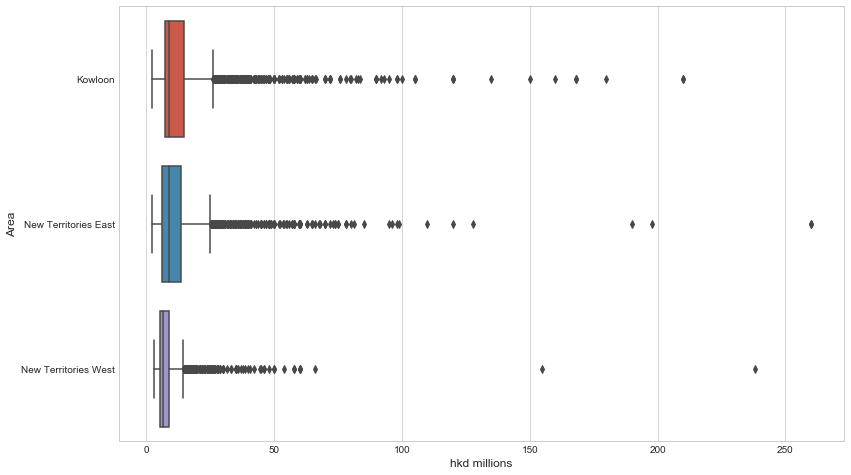

In [95]:
# box plot of 'hkd in millions by Area'
sns.boxplot(y='Area', x='hkd millions', data = rc)

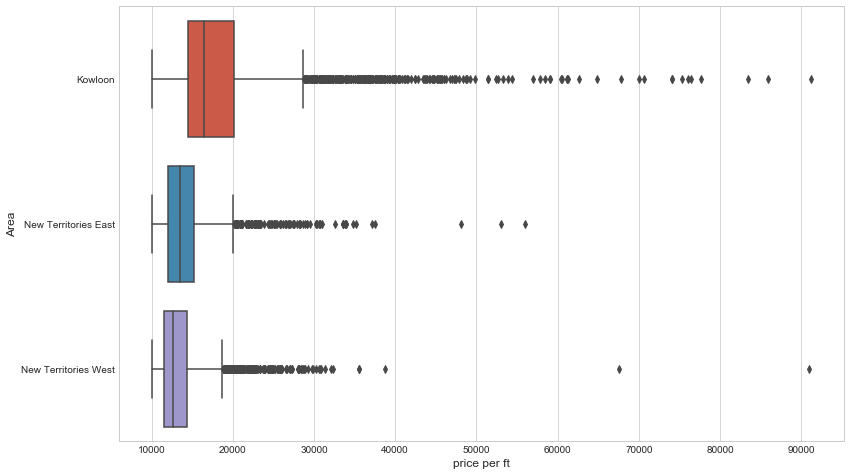

In [96]:
# box plot of 'price per ft by Area'
sns.boxplot(x='price per ft', y='Area', data=rc)

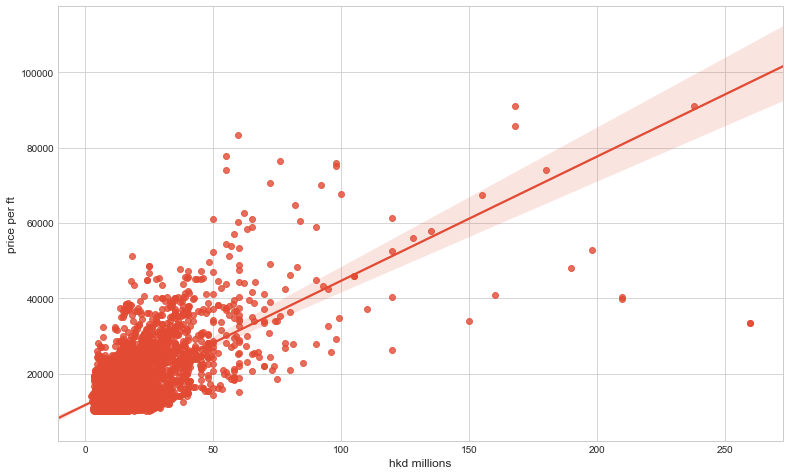

In [101]:
sns.regplot(y='price per ft', x='hkd millions', data=rc)

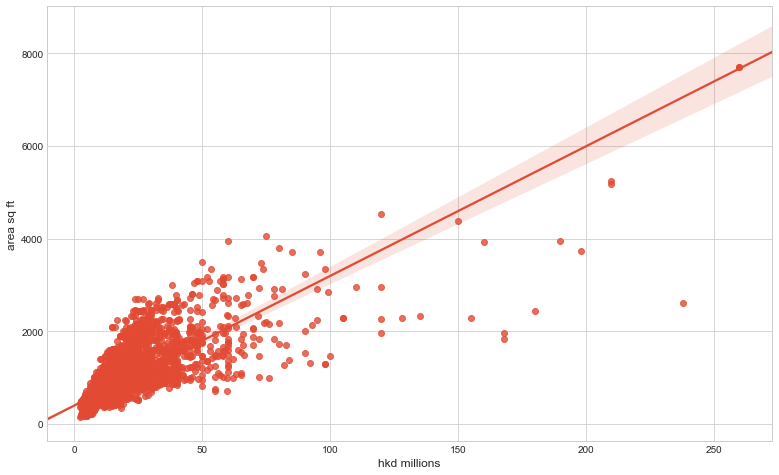

In [104]:
sns.regplot(y='area sq ft', x='hkd millions', data=rc)

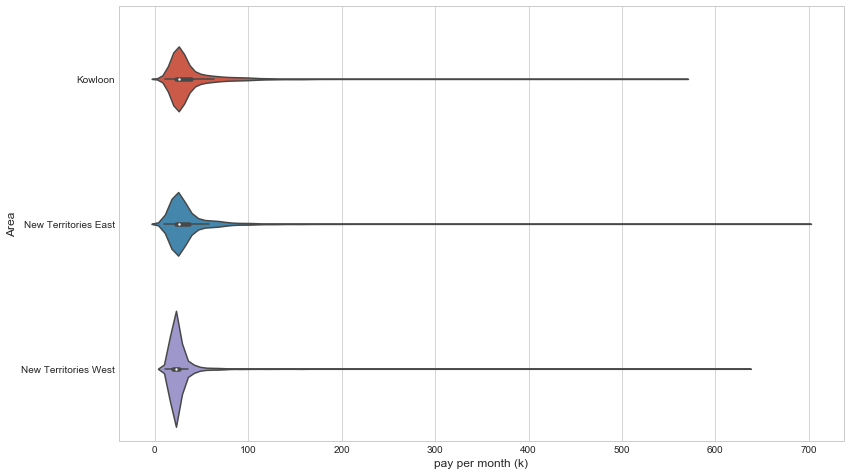

In [111]:
sns.violinplot(y='Area', x='pay per month (k)', data =rc)

** 3.) ** *Bonus* - In collumns that should be numerical use regular expressions to get the numbers and convert the columns from strings to numerical.

In [280]:
import re 

In [281]:
# %load solutions/ricacorp_3.py


In [288]:
ricacorp.head()

,location,characteristic,floor_type,hkd_millions,rent_hkd,area_sqft,address,last_updated,pay_per_month_K,loan_percent,first_payment_M
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,1137.0,Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,70.2,50.0,113.25
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,17.0,485.0,Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,23.8,60.0,13.00
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,40.0,794.0,Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,47.6,50.0,19.00
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,971.0,Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,37.0,50.0,16.99
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,1502.0,Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,66.2,50.0,112.50


In [ ]:
#

In [ ]:
# openrice['address'].apply(lambda s : s[:-1])
# remove commas
# make index as list to sort price_range mean median for likes,dislkies, bookmarks in range use .iloc

In [ ]:
def abc():
    n = re.search("",s)
    if n:
        return n.group()
    return np.nan

In [ ]:
def abc():
    n = re.search(r"\$(.+)([MK])",s)
    if n:
        if n.group(2) == 'M':
            return float(n.group(1)) * 1000
        else:
            return float(n.group(1))
        return n.group()
    return np.nan